In [4]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
from IPython.display import HTML

# Cantera tutorial with Python

Some useful links:
* https://cantera.org/tutorials/python-tutorial.html
* https://cantera.org/examples/python/index.html#python-example-onedim


In [5]:
gas = ct.Solution('gri30.yaml')

In [6]:
    fuel = {'CH4': 1}
    oxidizer = {'O2': 1, 'N2': 3.76}

    gas.TP = 293, 101325

    gas.set_equivalence_ratio(0.8, fuel, oxidizer)  # hold temperature and pressure constant

## Free Flame computation
<center><img src="Images/freeflame.png"/></center>

$\rho$ : density\
$S$: Flow speed\
$T$: Temperature (K)


In [7]:
    # 1D freely propagating flame
    #       Domain width in meters
    width = 0.1
    #       Create the flame object
    flame = ct.FreeFlame(gas, width=width)
    #       Transport model
    flame.transport_model = 'mixture-averaged'
    #       Energy equation
    flame.energy_enabled = True
    #       Soret effect (only with multi component transport model)
    flame.soret_enabled = False
    #       Define tolerances for the solver
    flame.set_refine_criteria(ratio=2, slope=0.6 , curve=0.1)
    #       Define logging level
    loglevel = 0
    #   Solving the flame
    flame.solve(loglevel=loglevel, auto=True)

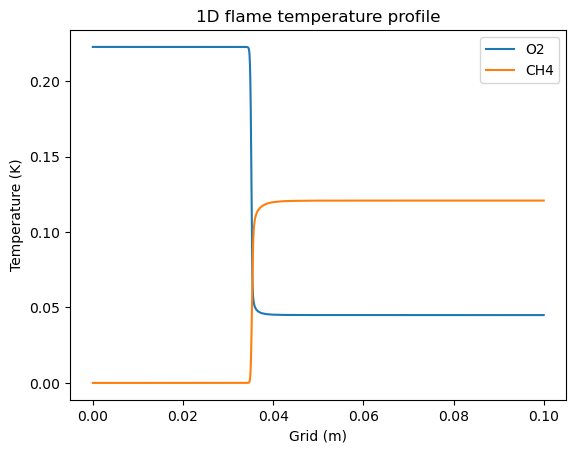

In [11]:
plt.figure()
plt.plot(flame.grid,flame.Y[3],label='O2')
plt.plot(flame.grid, flame.Y[15],label='CH4')
plt.legend()
plt.ylabel('Temperature (K)')
plt.xlabel('Grid (m)')
plt.title('1D flame temperature profile')
plt.show()